  <h1><center>“PROJECT WORK ON E-COMMERCE INDUSTRY”</center></h1>       
  <h1><center>"BY RAJ SINGH RATHORE"</center></h1> 

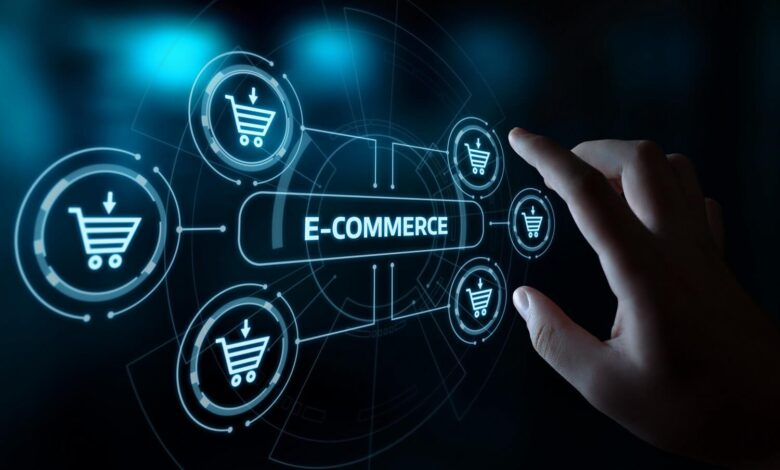 


<b><h2><center>E-COMMERCE INDUSTRY</center></h2></b>

## Problem Statement

### Context :
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### Dataset :
The dataset used for model building contained 10999 observations of 12 variables.

* ID - ID Number of Customers.
* Warehouse block - The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment - The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls - The number of calls made from enquiry for enquiry of the shipment.
* Customer rating - The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product - Cost of the Product in US Dollars.
* Prior purchases - The Number of Prior Purchase.
* Product importance - The company has categorized the product in the various parameter such as low, medium, high.
* Gender - Male and Female.
* Discount offered - Discount offered on that specific product.
* Weight in grams - It is the weight in grams.
* Reached on time - It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.



### Outcome Expected :

This data of Product Shipment Tracking, answer instantly to your questions:
* What was Customer Rating? And was the product delivered on time?
* Is Customer query is being answered if product importance is high, having highest customer rating or being delivered on time?


** **In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean.**





# Importing necessary libraries

In [58]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


## Reading the dataset

In [59]:
df=pd.read_csv(r"C:\Users\SONY\Downloads\E_Commerce.csv")

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [60]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [61]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


### Understand the shape of the dataset.

In [62]:
# Show data shape
df.shape

(10999, 12)

* The dataset has 10999 rows and 12 columns of data

### Check the data types of the columns for the dataset.

In [63]:
# Show data columns
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Summary of the dataset

In [65]:
# Numerical summary statistics
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


##  Observation Distribution of Features ##

#### Categorical:

* Warehouse block: The company has a big warehouse, which is divided in to blocks
* Mode of shipment: The company ships the products in multiple ways
* Product importance: Company assigns priority levels to each shipment
* Gender: Male and Female
* Reached on time: Target variable where the package either arrived on time or not
  * 0: Arrived on time
  * 1: Did not arrive on time
     * 59% of orders did not arrive on time
     * Meaning about only 41% of orders arrived on time
          
### Numerical:

* Customer care calls: The number of calls made by the customer to get shipping updates
   * Average customer calls about 4 times
   * Min # of calls is 2
   * Max # of calls is 7
   
   
* Customer rating: The rating the customer gave the company (1-5)
   * Average rating is 2.99 on a scale of 1-5
   
   
* Cost of the product: Cost of product in USD
   * Average product cost is $210
   
   * Min price is $96
   
   * Max price is $310
    
    
* Prior purchases: Number of prior purchases by customer
    * Average is 3.5
    * Min is 2
    * Max is 10
    
    
* Discount offered: Discount offered on specific product
    * Average discount is 13%
    * Min discount is 1% (I assume this is equal to 0)
    * Max discount is 65%
    
    
* Weight in gms: Weight of the package in grams
    * Average product weight is about 3634 grams (about 8 pounds)
    * Min weight is 1001 (about 2.2 pounds)
    * Max weight is 7846 (a little over 17 pounds)

**Dropping columns which are not adding any information.**

In [66]:
# dropping unwanted column using drop method

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data Cleaning and Pre-processing

In [67]:
# Check for missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

**Observations -**
* There are no null values in the dataset.

### Checking for duplicate values

In [68]:
df.duplicated().sum()

0

* There are no duplicate values in the data

**Let's look at the unique values of all the categories**

In [69]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [70]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [71]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [72]:
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [73]:
df["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [20]:
# Unique Values
print(f'Number of Unique Values in Each Column:\n{df.nunique()}')

Number of Unique Values in Each Column:
Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64


In [74]:
object1 = df.select_dtypes(include='object').columns
float1 = df.select_dtypes(exclude = 'object').columns
float1

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [75]:
for col in object1:
    print(col, '\n', df[col].unique(),'\n')

Warehouse_block 
 ['D' 'F' 'A' 'B' 'C'] 

Mode_of_Shipment 
 ['Flight' 'Ship' 'Road'] 

Product_importance 
 ['low' 'medium' 'high'] 

Gender 
 ['F' 'M'] 



## Rename columns to be more workable

## Other than this, the dataset is very clean

## Data Cleaning

In [77]:
# Renaming columns

df.rename(columns={'Warehouse_block': 'block',
                   'Mode_of_Shipment': 'ship_method',
                   'Customer_care_calls': 'num_calls',
                   'Customer_rating': 'rating',
                   'Cost_of_the_Product': 'cost',
                   'Prior_purchases': 'num_prev_orders',
                   'Product_importance': 'priority',
                   'Gender': 'gender',
                   'Discount_offered': 'discount',
                   'Weight_in_gms': 'weight',
                   'Reached.on.Time_Y.N': 'on_time'},
          inplace=True)

In [78]:
# output cleaned df

df.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

# Univariate Analysis

### Plotting Count of Categorical Features

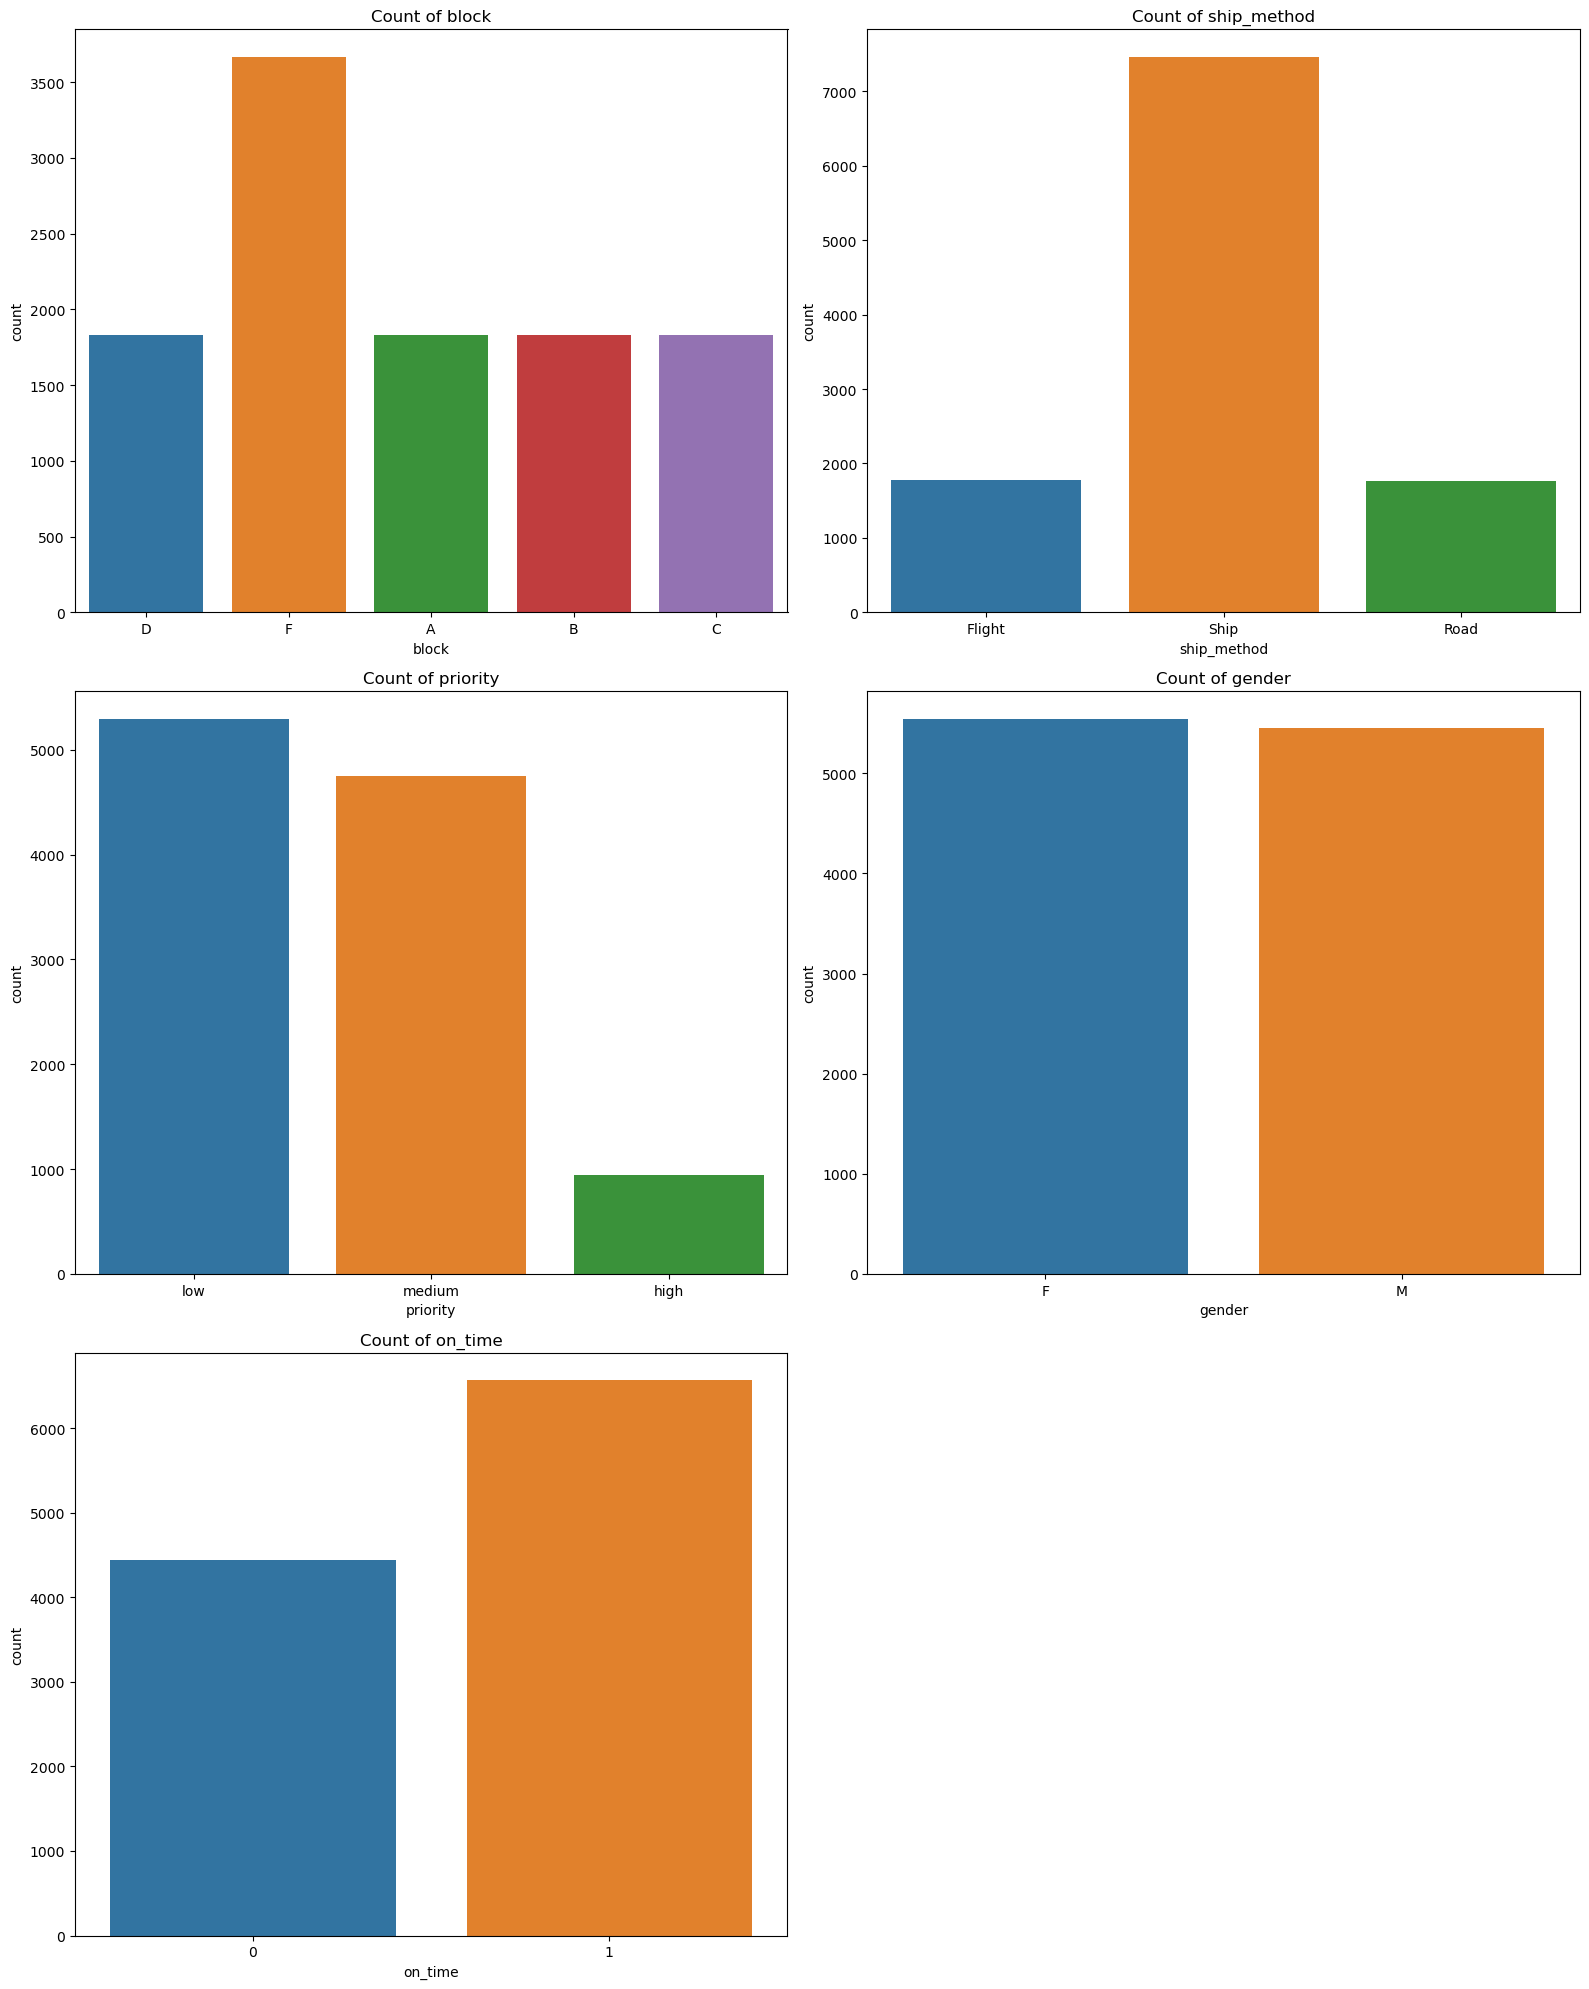

In [79]:
cat_cols = ['block', 'ship_method', 'priority', 'gender',
        'on_time']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cat_cols)):
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(x = cat_cols[i], data = df, ax = ax)
        plt.title(f'Count of {cat_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

### Plotting Distributions of Numerical Features

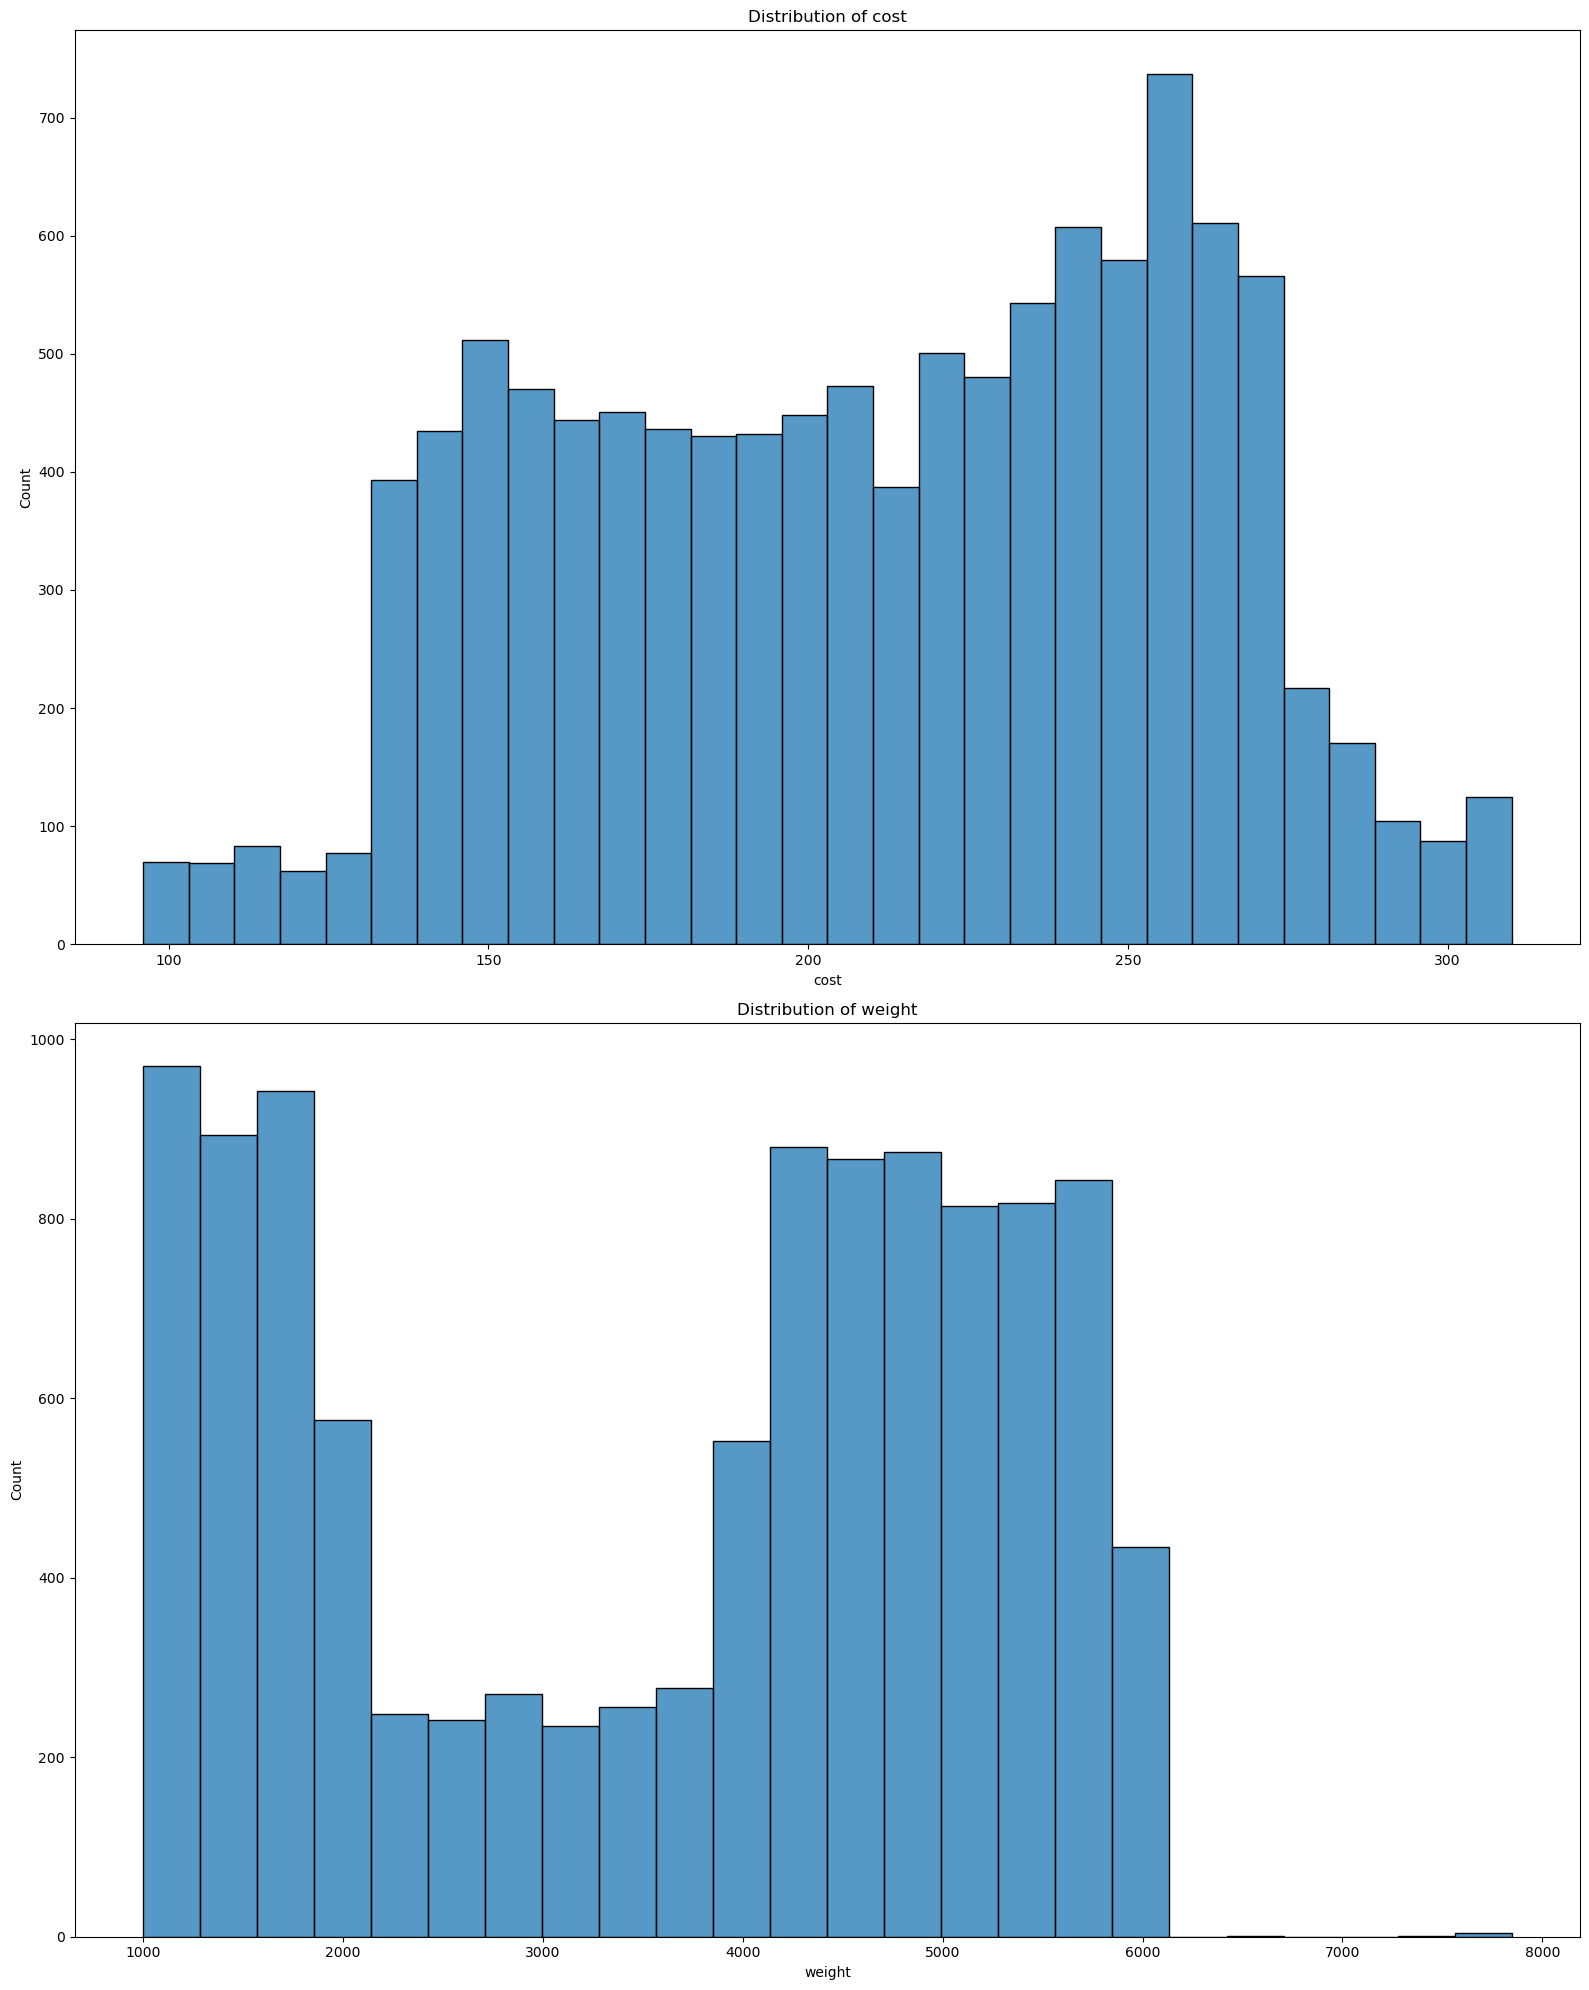

In [80]:
cont_cols = ['cost', 'weight']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cont_cols)):
        ax = plt.subplot(2, 1, plotnumber)
        sns.histplot(x = cont_cols[i], data = df, ax = ax)
        plt.title(f'Distribution of {cont_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

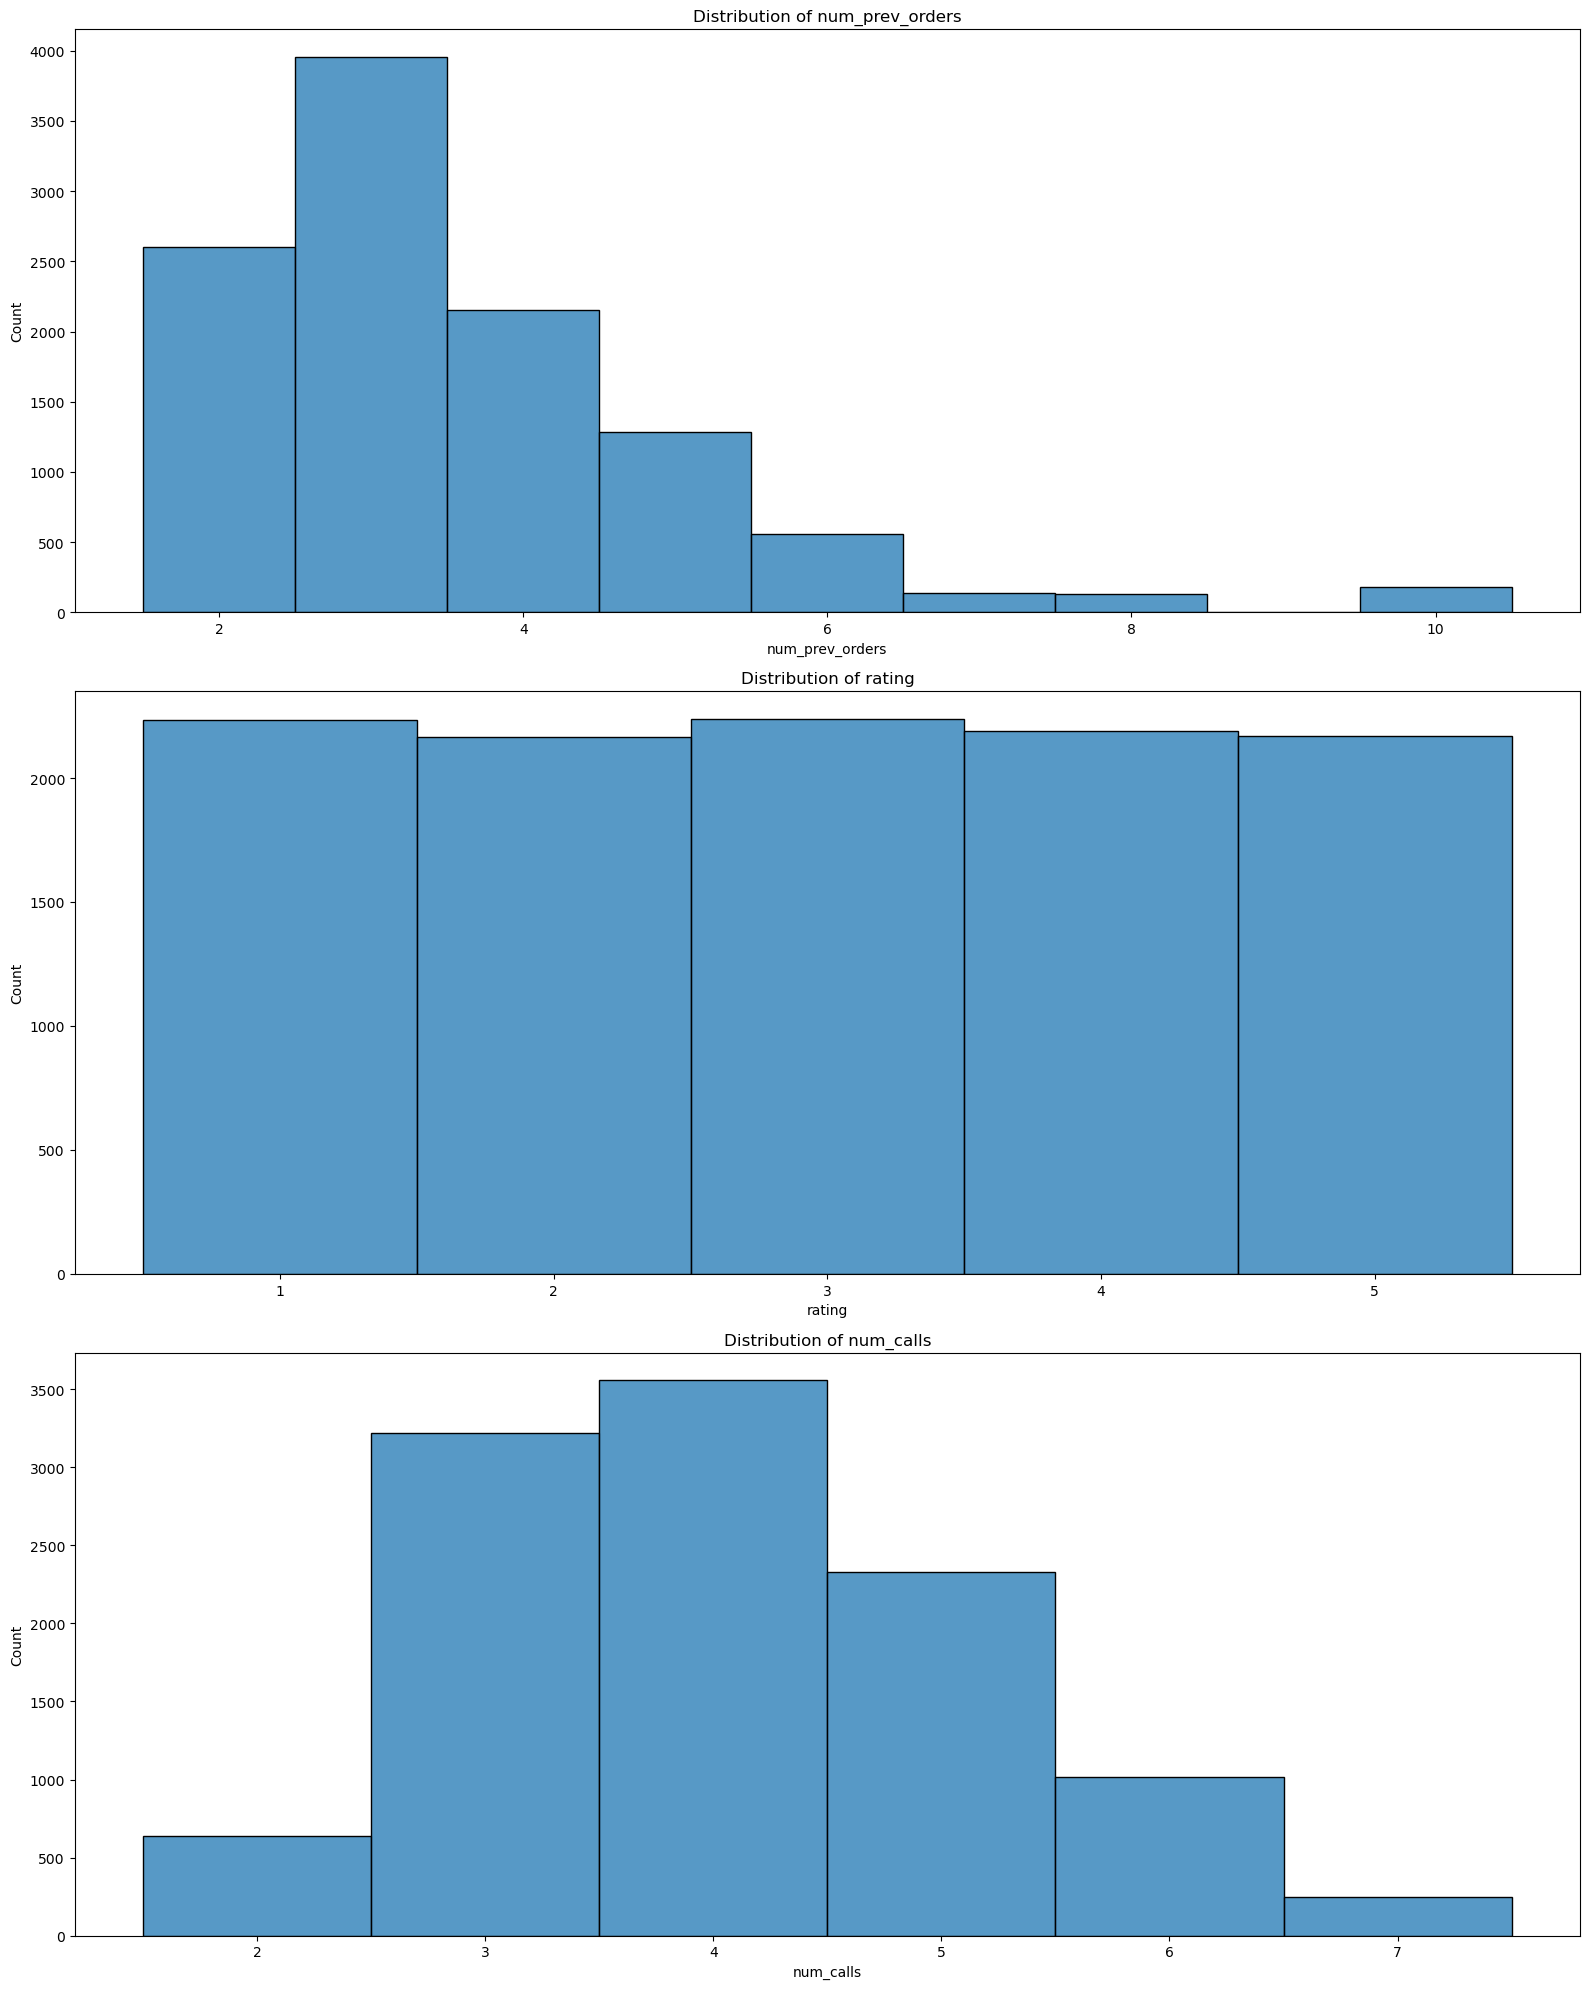

In [81]:
dis_cols = ['num_prev_orders', 'rating', 'num_calls']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(dis_cols)):
        ax = plt.subplot(3, 1, plotnumber)
        sns.histplot(x = dis_cols[i], data = df, ax = ax, discrete=True)
        plt.title(f'Distribution of {dis_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

## Univariate Observations :

* Warehouse_block is broken down into 5 categories: A, B, C, D, F
* ship_method has 3 categories: plane, ship, or road
* There are 3 priority levels: low, medium, high
* Warehouse block F has the most orders with just over 3,500. The other 4 all have just under 2,000 orders
* Ship is by far the most common transportation method with
* Most customers call about the status of their order 3-4 times, but 5 calls is not far behind
* As stated before, the average rating is just under 3 on a 1-5 scale. This is because the distribution of ratings is extremely equal
* Most customers have 3 previous orders, but it is not uncommon for a customer to have between 2-5 prior purchases
* About 48% of the orders are of low priority and the rest is made up of 43% medium priorty and the other ~9% is high priority
* The dataset represents almost a perfect split of orders by Males and Females, with there being slightly more orders by Females
* About 60% of orders are NOT delivered on time, and the other 40% are delivered as estimated
* Most orders cost between $150-\$250
* Almost all discounts are 10% or less with the highest discount at almost 65%, but it is very uncommon
* The heaviest order is just under 8,000g. The distribution of package weights is bimodal, with peaks between 1,000g - 2,000g and a peak at 4,000g - 6,000g

# Bivariate Analysis

### Observations on Number of Calls by Product Cost

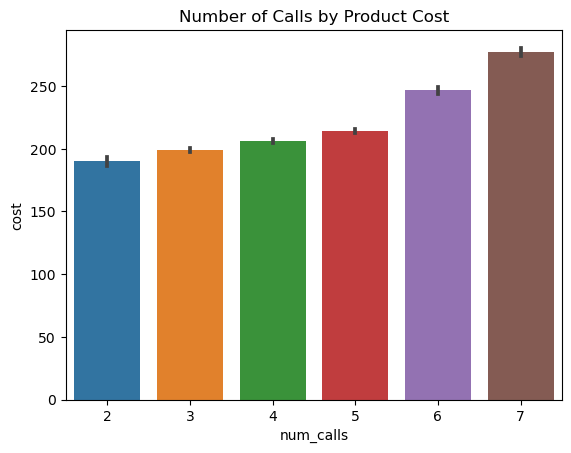

In [82]:
plt.title('Number of Calls by Product Cost')
g = sns.barplot(x='num_calls',y='cost', data=df)

### Observations on Number of Calls by Discount

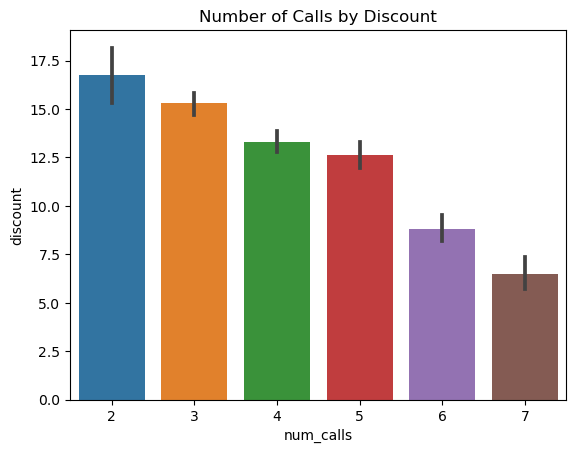

In [83]:
plt.title('Number of Calls by Discount')
g = sns.barplot(x='num_calls',y='discount', data=df)

### Observations on On Time Delivery Compared to Product Weight

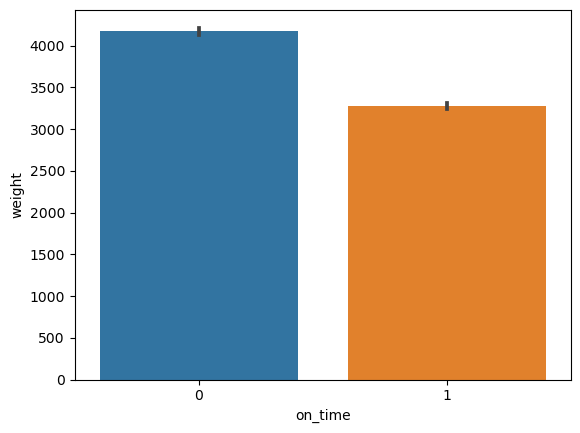

In [84]:
# plt.title('On Time Delivery Compared to Product Weight')
g = sns.barplot(x='on_time',y='weight', data=df)

### Observations on On Time Delivery Compared to Product Discount

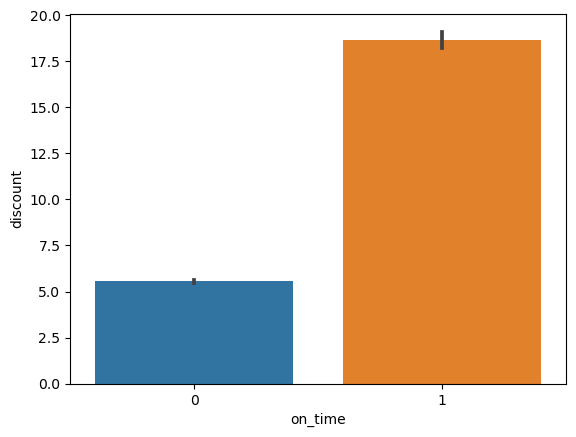

In [85]:
# plt.title('On Time Delivery Compared to Product Discount')
g = sns.barplot(x='on_time',y='discount', data=df)

# Bivariate Observations :

* The relationship between the number of calls a customer makes and the cost of the product consistenltly increase as the cost rises
* On the other hand, the number of calls decreases as the discount % decreases. The higher the discount, the less likely a    customer is to inquire about it
* Heavier products are more likely to arrive on time
* Higher discounted products are much less likely to arrive on time

# Multivariate Analysis

### Correlation check

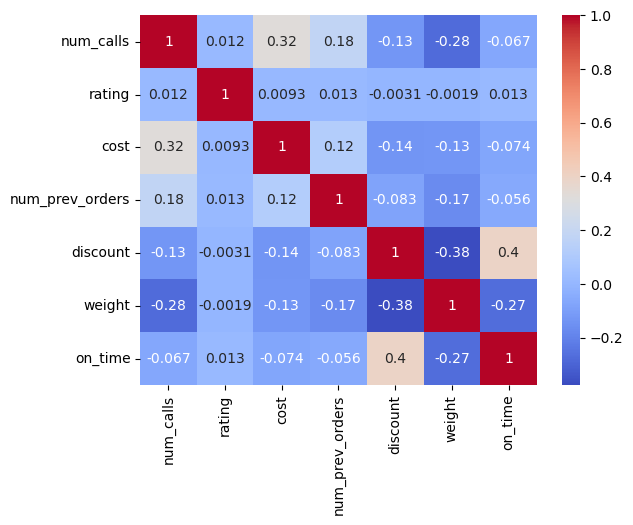

In [86]:
# Check for multicollinearity
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Multivariate Observations :

* The product discount is the feature that most highly correlates to if a product is delivered on time

* Number of calls and product cost are also highly correlated

* Discount Offered have high positive correlation with Reached on Time or Not of 40%.
* Weights in gram have negative correlation with Reached on Time or Not -27%.
* Discount Offered and weights in grams have negative correlation -38%.
* Customer care calls and weights in grams have negative correlation -28%.
* Customer care calls and cost of the product have positive correlation of 32%.
* Prior Purchases and Customer care calls have slightly positive correlation.

## Pairplot

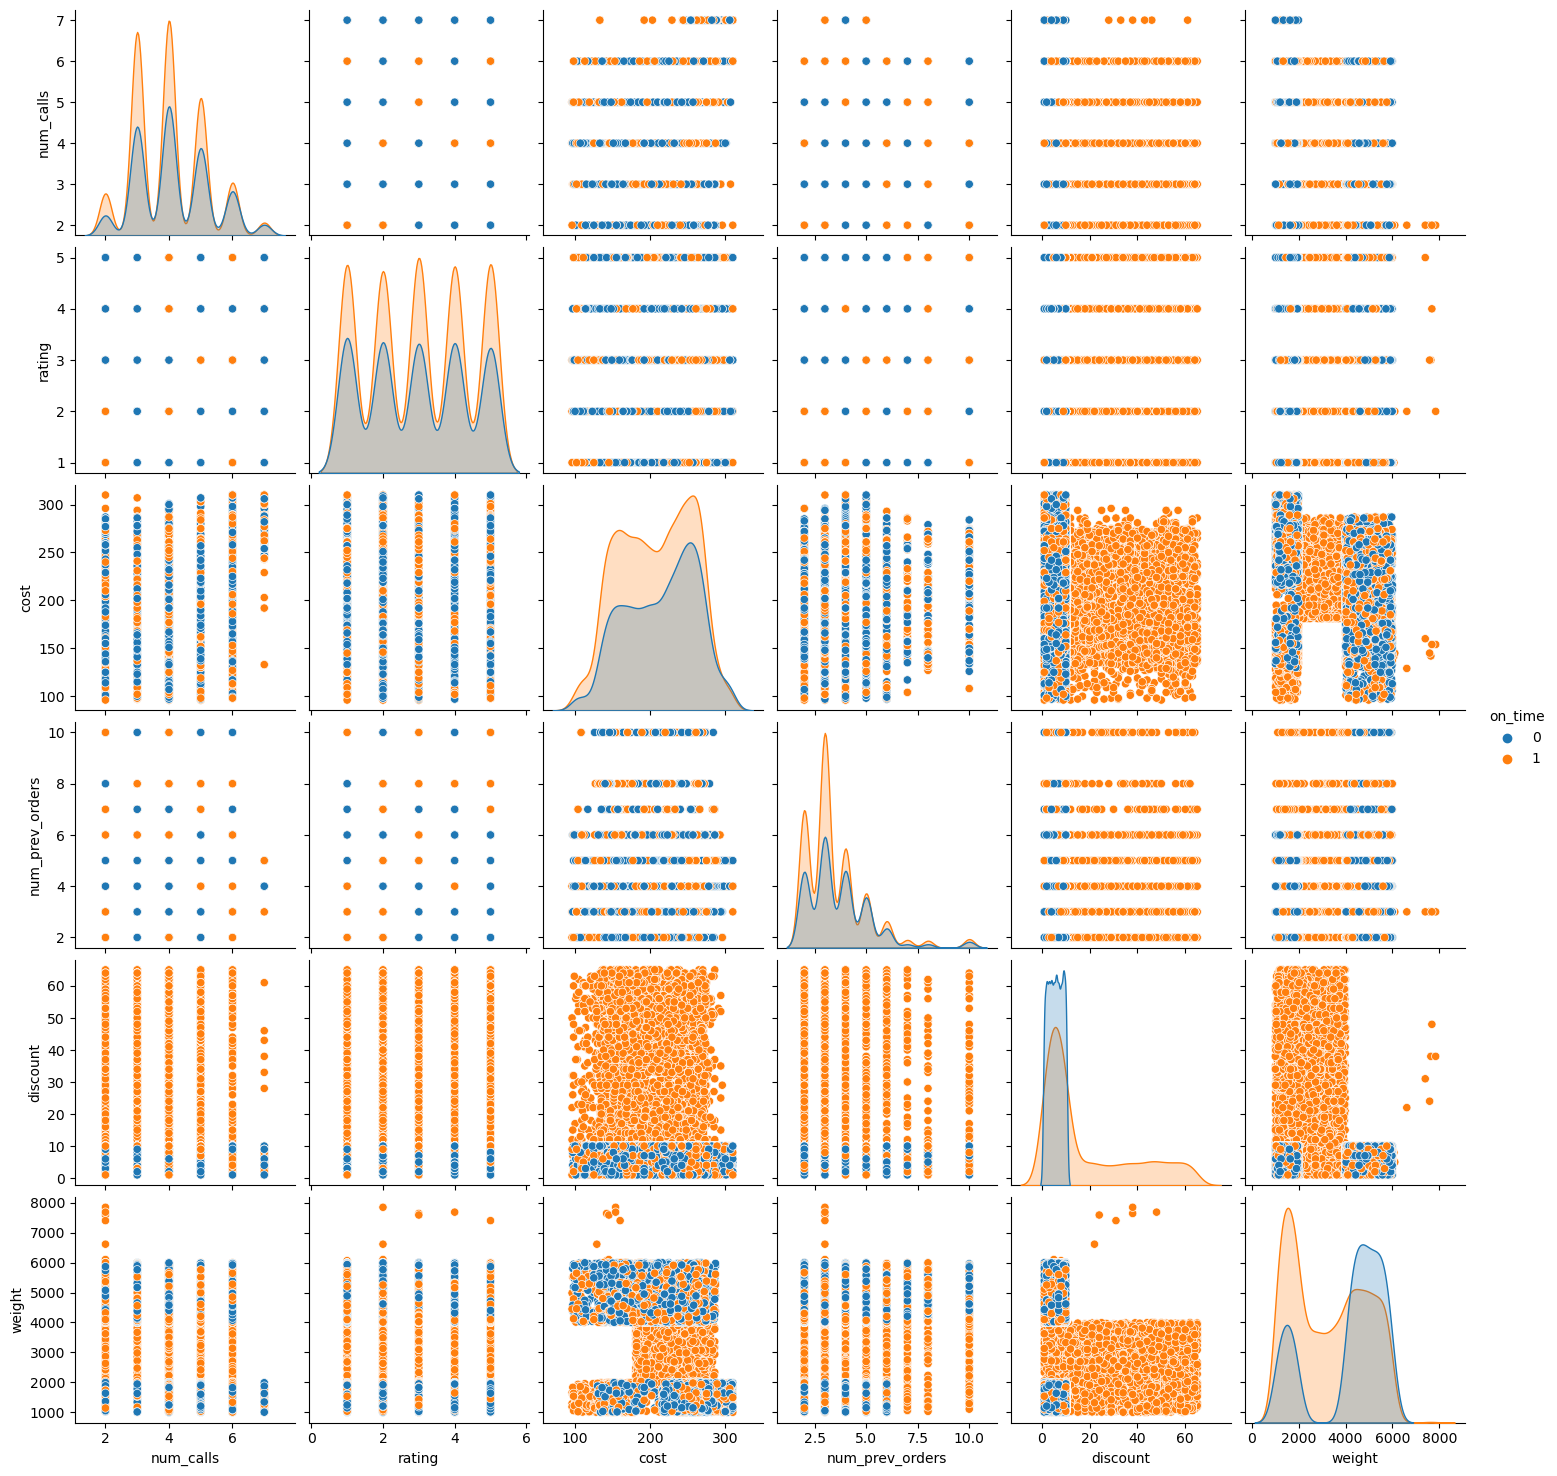

In [87]:
# Data Exploration (EDA)
# Visualize the relationships between variables
sns.pairplot(df, hue='on_time')
plt.show()


# Conclusion

As a result of this analysis, I would highly suggest this company restructure their product delivery strategies as over half (nearly 60%) of order were not delivered on time. Warehouse block F received way more orders than any other block. I would recommend splitting orders up evenly between blocks to try and reduce backlog. Overall, the customer rating is fairly average, this could likely be increased easily, but the current figure is not too bad. If there were more features about the data, I would be interested at looking at why the discount relates to the liklihood of being delivered on time, my best guess may be that products with higher discounts are products that the company may be trying to move faster to make room for new inventory

# Q1: What was Customer Rating? And was the product delivered on time?

In [88]:
# Check the distribution of Customer Ratings
customer_ratings = df['rating'].value_counts()
print("Customer Ratings Distribution:\n", customer_ratings)

# Check the distribution of product delivery on time
delivery_distribution = df['on_time'].value_counts()
print("Product Delivery Distribution:\n", delivery_distribution)


Customer Ratings Distribution:
 3    2239
1    2235
4    2189
5    2171
2    2165
Name: rating, dtype: int64
Product Delivery Distribution:
 1    6563
0    4436
Name: on_time, dtype: int64


# Q2: Is Customer query being answered if product importance is high, having the highest customer rating, or being delivered on time?

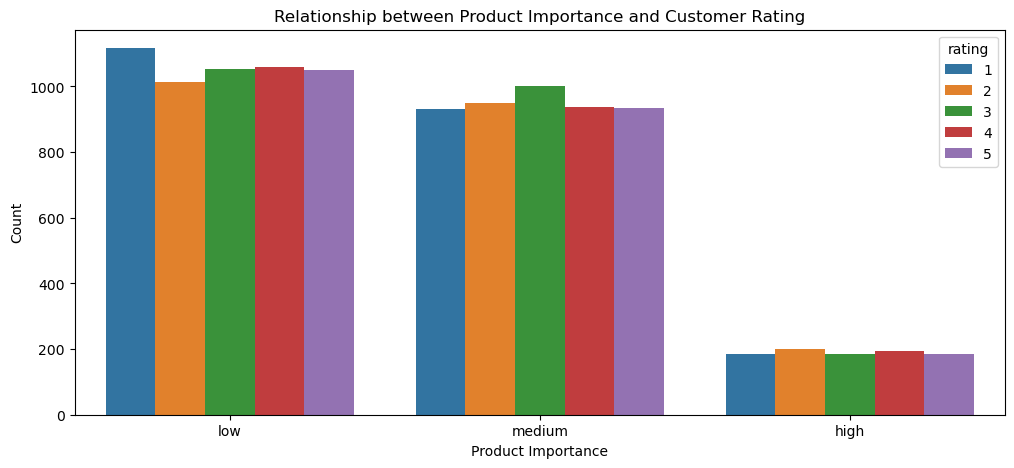

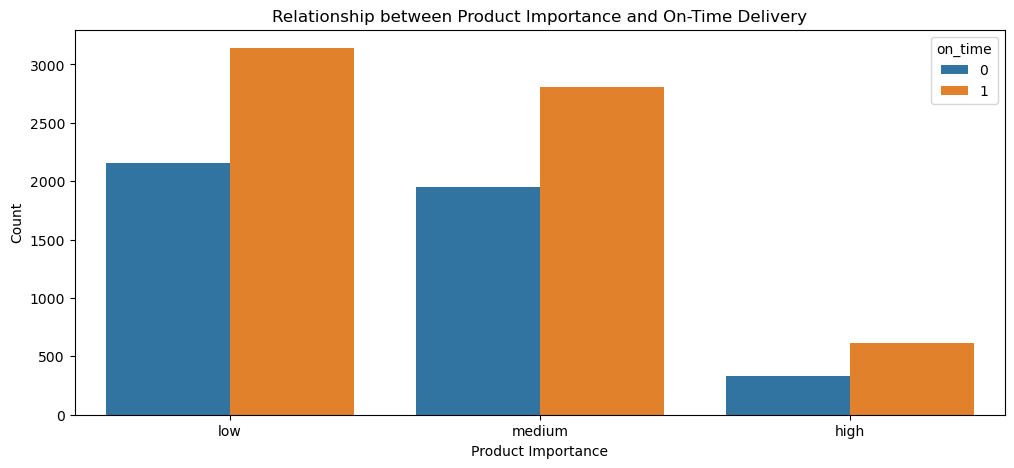

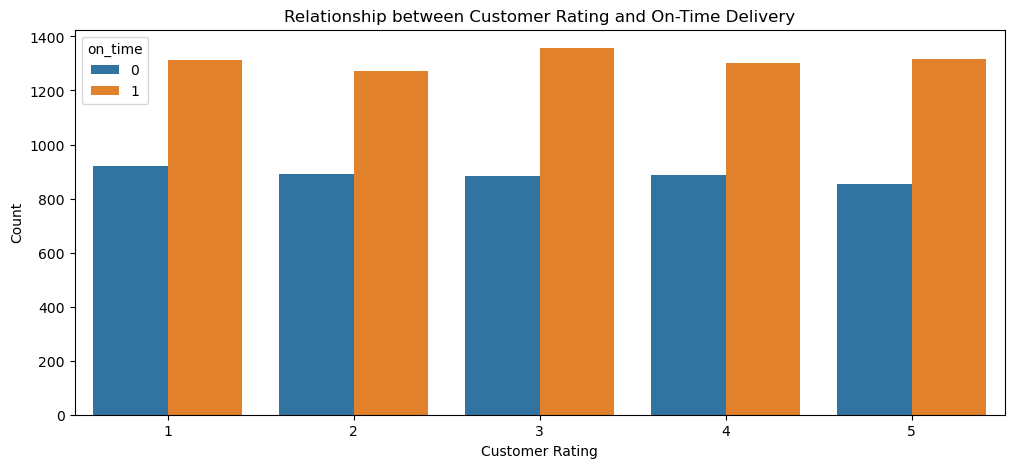

In [89]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check the relationship between product importance and customer rating using bar plots
plt.figure(figsize=(12, 5))
sns.countplot(x='priority', hue='rating', data=df)
plt.title('Relationship between Product Importance and Customer Rating')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.show()

# Check the relationship between product importance and on-time delivery using bar plots
plt.figure(figsize=(12, 5))
sns.countplot(x='priority', hue='on_time', data=df)
plt.title('Relationship between Product Importance and On-Time Delivery')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.show()

# Check the relationship between customer rating and on-time delivery using bar plots
plt.figure(figsize=(12, 5))
sns.countplot(x='rating', hue='on_time', data=df)
plt.title('Relationship between Customer Rating and On-Time Delivery')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.show()


## Data Preprocessing

### Outlier Detection and Treatment

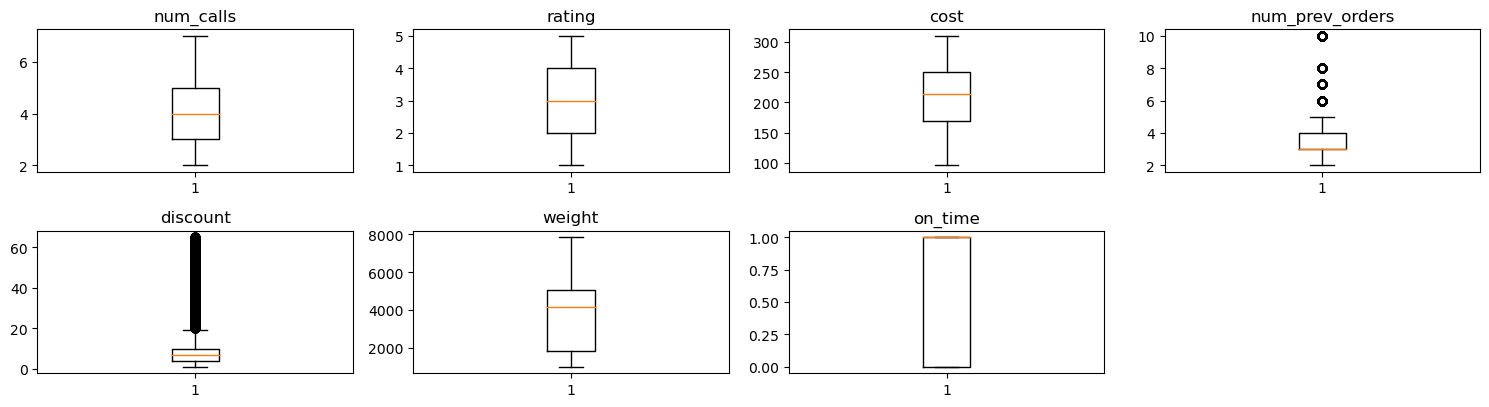

In [90]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

# Data Preparataion for model building

In [91]:
df.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Convert categorical variables to numerical using one-hot encoding

In [94]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(df)
data.head(5)

,num_calls,rating,cost,num_prev_orders,discount,weight,on_time,block_A,block_B,block_C,block_D,block_F,ship_method_Flight,ship_method_Road,ship_method_Ship,priority_high,priority_low,priority_medium,gender_F,gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [104]:
# Define features and target variable
X = data.drop('on_time', axis=1)
y = data['on_time']
X


,num_calls,rating,cost,num_prev_orders,discount,weight,block_A,block_B,block_C,block_D,block_F,ship_method_Flight,ship_method_Road,ship_method_Ship,priority_high,priority_low,priority_medium,gender_F,gender_M
0,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,0,1,0,0,1,0,1


In [105]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled)

       num_calls    rating      cost  num_prev_orders  discount    weight  \
0      -0.047711 -0.700755 -0.690722        -0.372735  1.889983 -1.468240   
1      -0.047711  1.421578  0.120746        -1.029424  2.815636 -0.333893   
2      -1.799887 -0.700755 -0.565881         0.283954  2.136824 -0.159002   
3      -0.923799  0.006689 -0.711529         0.283954 -0.208162 -1.502484   
4      -1.799887 -0.700755 -0.545074        -0.372735  2.013404 -0.703244   
...          ...       ...       ...              ...       ...       ...   
10994  -0.047711 -1.408199  0.869792         0.940643 -0.763553 -1.281730   
10995  -0.047711 -1.408199  0.453655         0.940643 -0.455002 -1.459679   
10996   0.828377  0.714133  0.661724         0.940643 -0.578423 -1.515937   
10997   0.828377 -0.700755  0.266394         1.597332 -0.701843 -1.482304   
10998  -1.799887  1.421578 -1.148472         0.940643 -0.455002 -1.219968   

        block_A   block_B   block_C   block_D   block_F  ship_method_Flight

In [106]:
X = X_scaled
X.head()

,num_calls,rating,cost,num_prev_orders,discount,weight,block_A,block_B,block_C,block_D,block_F,ship_method_Flight,ship_method_Road,ship_method_Ship,priority_high,priority_low,priority_medium,gender_F,gender_M
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496,0.991760,-0.991760
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496,-1.008308,1.008308
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496,-1.008308,1.008308
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,-0.963832,1.146137,-1.008308,1.008308
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,-0.963832,1.146137,0.991760,-0.991760


In [107]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: on_time, Length: 10999, dtype: int64

In [108]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8799, 19) (2200, 19) (8799,) (2200,)


In [109]:
y.value_counts(1)

1    0.596691
0    0.403309
Name: on_time, dtype: float64

In [110]:
y_test.value_counts(1)

1    0.593182
0    0.406818
Name: on_time, dtype: float64

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

# Model Building

## Testing Accuracy

#############################################
######-Model => DecisionTreeClassifier 
Test Accuracy :  64.36%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

             Confusion_matrix 


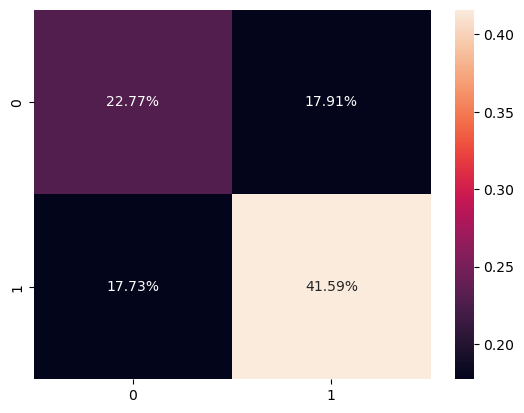

###################- End -###################
#############################################
######-Model => RandomForestClassifier 
Test Accuracy :  65.73%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.74      0.64      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200

             Confusion_matrix 


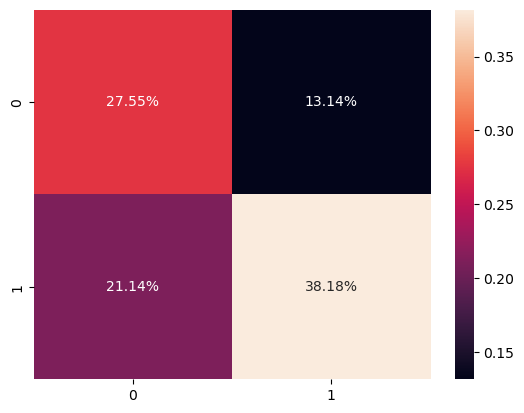

###################- End -###################
#############################################
######-Model => AdaBoostClassifier 
Test Accuracy :  67.91%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       895
           1       0.77      0.65      0.71      1305

    accuracy                           0.68      2200
   macro avg       0.68      0.69      0.68      2200
weighted avg       0.70      0.68      0.68      2200

             Confusion_matrix 


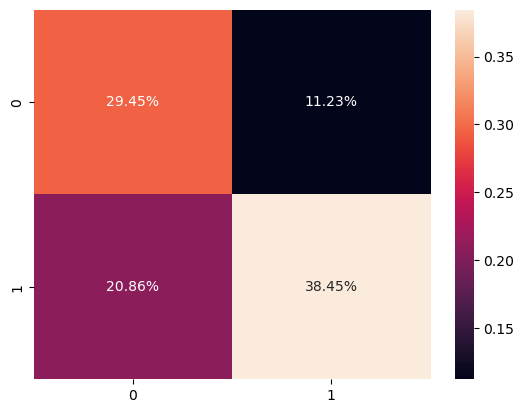

###################- End -###################
#############################################
######-Model => KNeighborsClassifier 
Test Accuracy :  62.91%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       895
           1       0.70      0.67      0.68      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200

             Confusion_matrix 


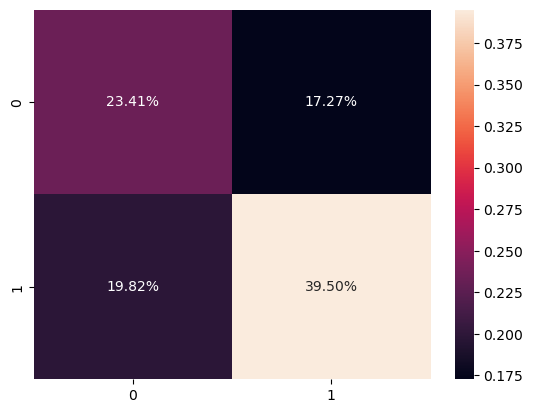

###################- End -###################
#############################################
######-Model => XGBClassifier 
Test Accuracy :  65.77%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       895
           1       0.73      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200

             Confusion_matrix 


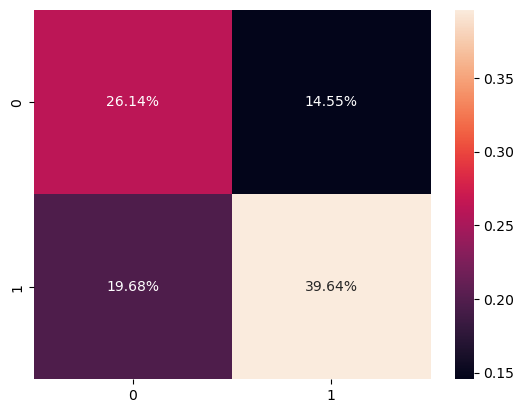

###################- End -###################
#############################################
######-Model => BaggingClassifier 
Test Accuracy :  66.45%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       895
           1       0.76      0.63      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200

             Confusion_matrix 


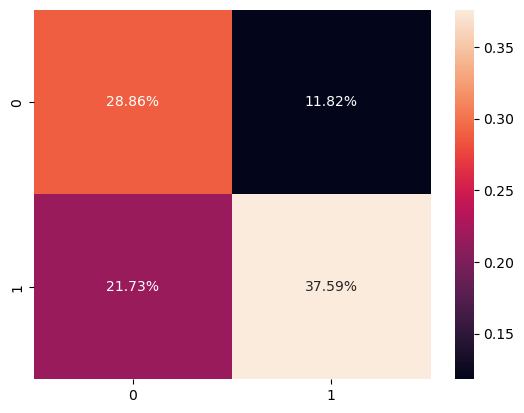

###################- End -###################
#############################################
######-Model => GradientBoostingClassifier 
Test Accuracy :  68.77%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       895
           1       0.86      0.57      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.74      0.69      0.69      2200

             Confusion_matrix 


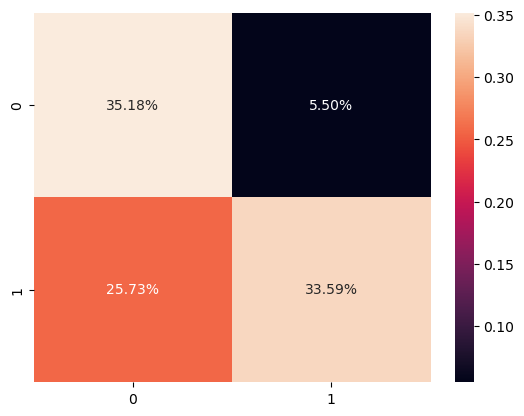

###################- End -###################
#############################################
######-Model => ExtraTreesClassifier 
Test Accuracy :  65.64%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       895
           1       0.73      0.68      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200

             Confusion_matrix 


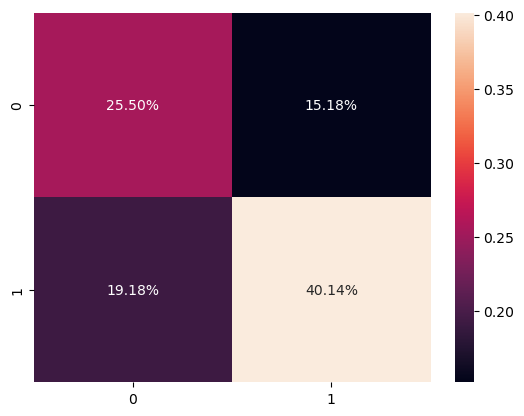

###################- End -###################
#############################################
######-Model => GaussianNB 
Test Accuracy :  65.41%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.54      0.97      0.69       895
           1       0.95      0.44      0.60      1305

    accuracy                           0.65      2200
   macro avg       0.75      0.70      0.65      2200
weighted avg       0.78      0.65      0.64      2200

             Confusion_matrix 


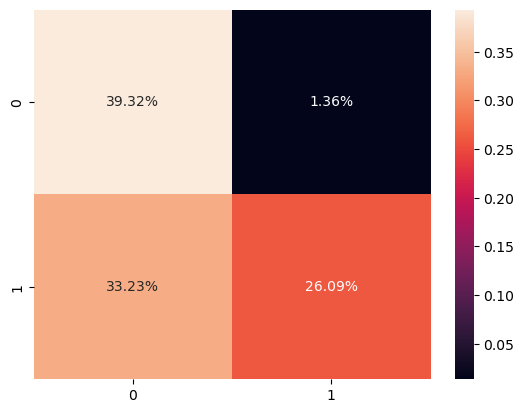

###################- End -###################
#############################################
######-Model => LogisticRegression 
Test Accuracy :  64.41%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

             Confusion_matrix 


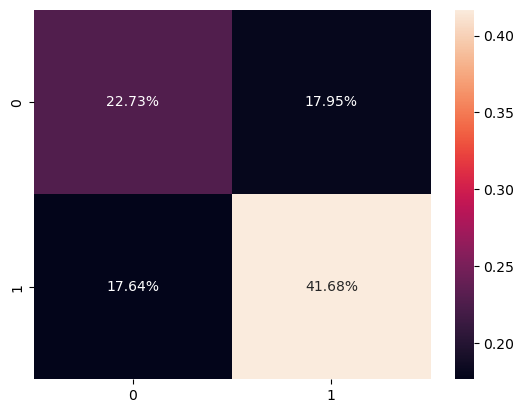

###################- End -###################
#############################################
######-Model => SVC 
Test Accuracy :  65.82%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       895
           1       0.78      0.59      0.67      1305

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.66      2200

             Confusion_matrix 


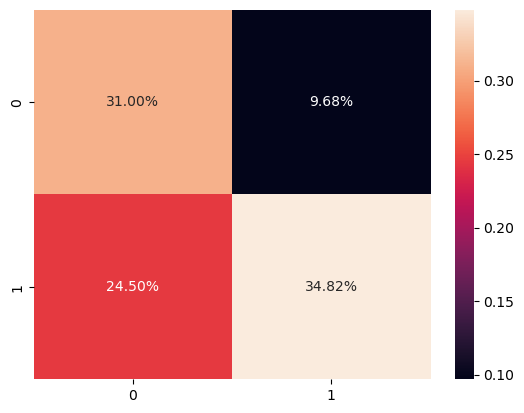

###################- End -###################


In [111]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,XGBClassifier,BaggingClassifier,GradientBoostingClassifier
         ,ExtraTreesClassifier,GaussianNB,LogisticRegression,SVC]
accuracy_test=[]
model = []
for m in models:
    model_name = type(m()).__name__
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(model_name))
    model_ = m()
    
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    model.append(model_name)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

## Comparing all the models

In [112]:
model = pd.Series(model, name='Model').astype(str)
acc_test = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, acc_test],axis=1)
output

,Model,Accuracy
0,DecisionTreeClassifier,0.643636
1,RandomForestClassifier,0.657273
2,AdaBoostClassifier,0.679091
3,KNeighborsClassifier,0.629091
4,XGBClassifier,0.657727
5,BaggingClassifier,0.664545
6,GradientBoostingClassifier,0.687727
7,ExtraTreesClassifier,0.656364
8,GaussianNB,0.654091
9,LogisticRegression,0.644091


## Visualize All Model  

### testing performance comparison

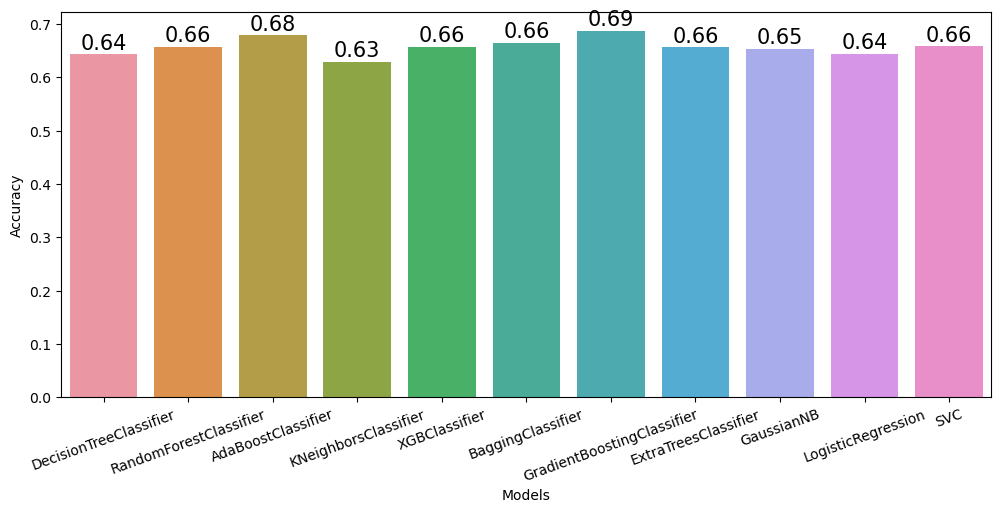

In [113]:
plt.figure(figsize=(12, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

## Training Accuracy

#############################################
######-Model => DecisionTreeClassifier 
Train Accuracy :  100.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3541
           1       1.00      1.00      1.00      5258

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799

             Confusion_matrix 


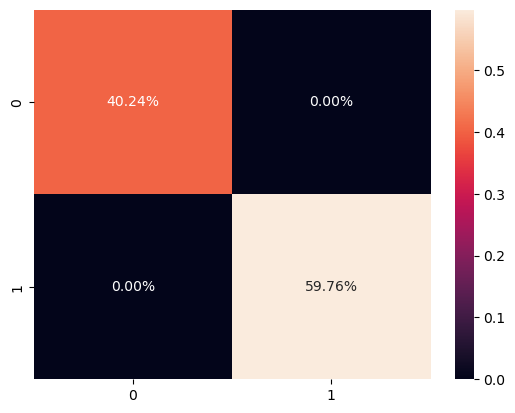

###################- End -###################
#############################################
######-Model => RandomForestClassifier 
Train Accuracy :  100.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3541
           1       1.00      1.00      1.00      5258

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799

             Confusion_matrix 


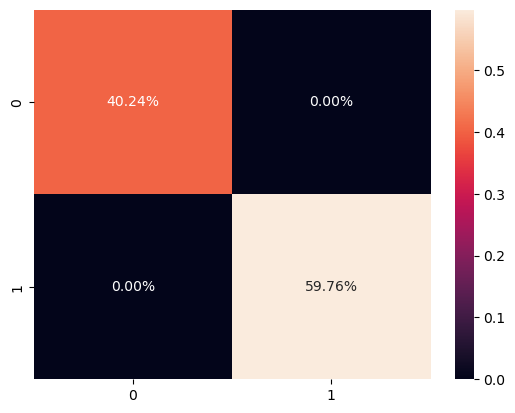

###################- End -###################
#############################################
######-Model => AdaBoostClassifier 
Train Accuracy :  67.56%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.58      0.73      0.64      3541
           1       0.78      0.64      0.70      5258

    accuracy                           0.68      8799
   macro avg       0.68      0.68      0.67      8799
weighted avg       0.70      0.68      0.68      8799

             Confusion_matrix 


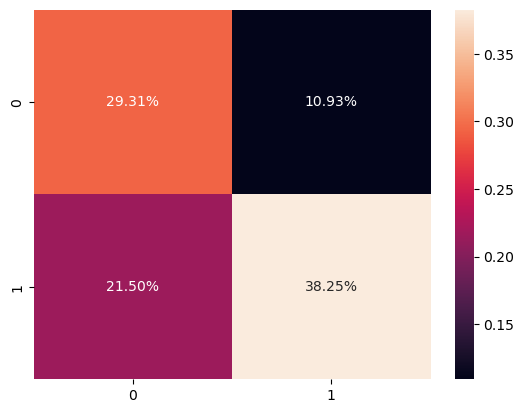

###################- End -###################
#############################################
######-Model => KNeighborsClassifier 
Train Accuracy :  77.01%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3541
           1       0.82      0.79      0.80      5258

    accuracy                           0.77      8799
   macro avg       0.76      0.77      0.76      8799
weighted avg       0.77      0.77      0.77      8799

             Confusion_matrix 


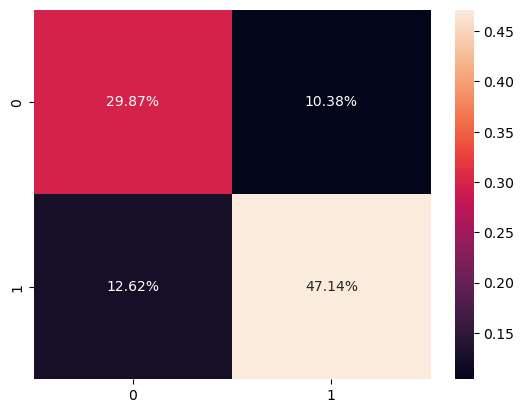

###################- End -###################
#############################################
######-Model => XGBClassifier 
Train Accuracy :  91.77%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3541
           1       0.96      0.90      0.93      5258

    accuracy                           0.92      8799
   macro avg       0.91      0.92      0.92      8799
weighted avg       0.92      0.92      0.92      8799

             Confusion_matrix 


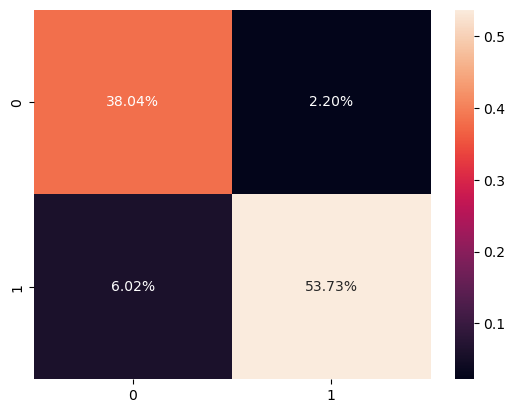

###################- End -###################
#############################################
######-Model => BaggingClassifier 
Train Accuracy :  98.68%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3541
           1       1.00      0.98      0.99      5258

    accuracy                           0.99      8799
   macro avg       0.98      0.99      0.99      8799
weighted avg       0.99      0.99      0.99      8799

             Confusion_matrix 


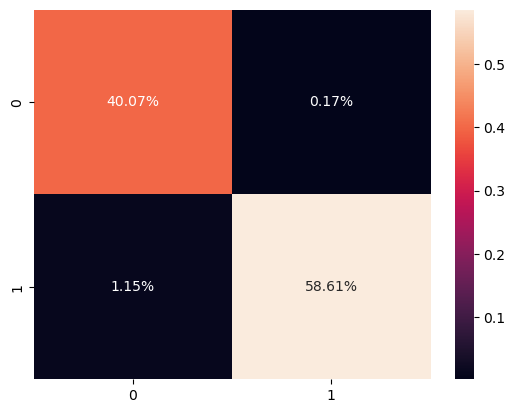

###################- End -###################
#############################################
######-Model => GradientBoostingClassifier 
Train Accuracy :  71.66%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.60      0.92      0.72      3541
           1       0.91      0.58      0.71      5258

    accuracy                           0.72      8799
   macro avg       0.75      0.75      0.72      8799
weighted avg       0.79      0.72      0.72      8799

             Confusion_matrix 


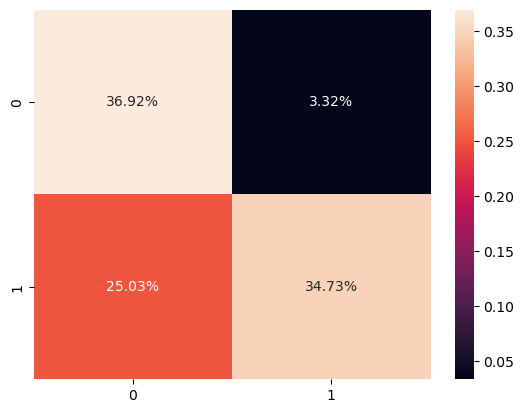

###################- End -###################
#############################################
######-Model => ExtraTreesClassifier 
Train Accuracy :  100.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3541
           1       1.00      1.00      1.00      5258

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799

             Confusion_matrix 


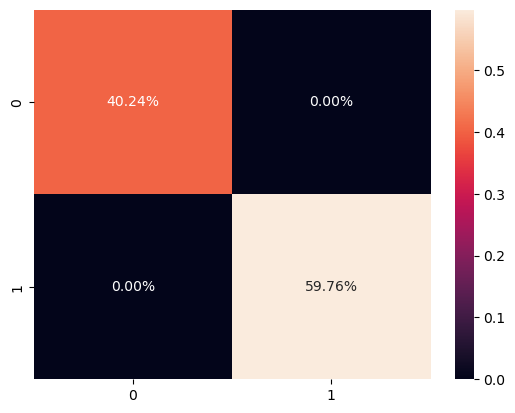

###################- End -###################
#############################################
######-Model => GaussianNB 
Train Accuracy :  65.04%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.54      0.97      0.69      3541
           1       0.95      0.44      0.60      5258

    accuracy                           0.65      8799
   macro avg       0.74      0.70      0.64      8799
weighted avg       0.78      0.65      0.64      8799

             Confusion_matrix 


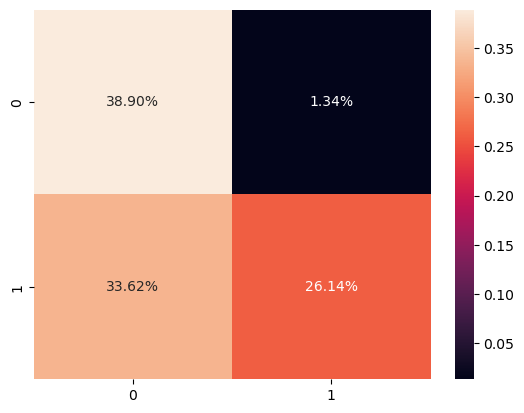

###################- End -###################
#############################################
######-Model => LogisticRegression 
Train Accuracy :  64.08%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      3541
           1       0.71      0.68      0.69      5258

    accuracy                           0.64      8799
   macro avg       0.63      0.63      0.63      8799
weighted avg       0.64      0.64      0.64      8799

             Confusion_matrix 


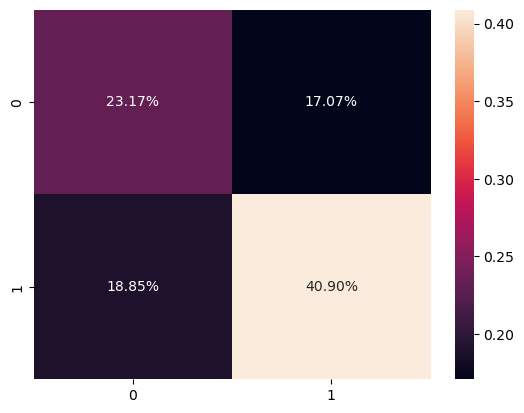

###################- End -###################
#############################################
######-Model => SVC 
Train Accuracy :  70.72%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      3541
           1       0.84      0.63      0.72      5258

    accuracy                           0.71      8799
   macro avg       0.72      0.73      0.71      8799
weighted avg       0.74      0.71      0.71      8799

             Confusion_matrix 


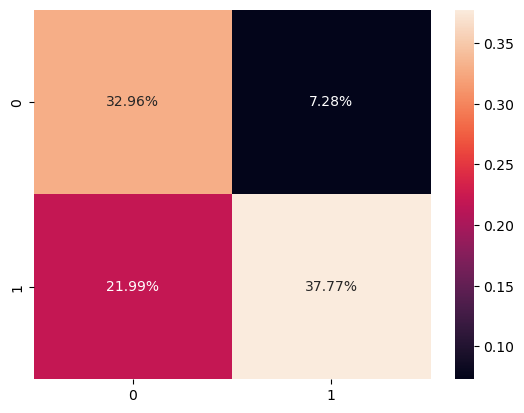

###################- End -###################


In [114]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,XGBClassifier,BaggingClassifier,GradientBoostingClassifier,
         ExtraTreesClassifier,GaussianNB,LogisticRegression,SVC]
accuracy_train=[]
model = []
for m in models:
    model_name = type(m()).__name__
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(model_name))
    model_ = m()
    
    model_.fit(X_train, y_train)
    pred = model_.predict(X_train)
    acc = accuracy_score(pred, y_train)
    accuracy_train.append(acc)
    model.append(model_name)
    print('Train Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_train, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_train, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

## Comparing all the models

In [115]:
model = pd.Series(model, name='Model').astype(str)
acc_train = pd.Series(accuracy_train, name='Accuracy')
output = pd.concat([model, acc_train],axis=1)
output

,Model,Accuracy
0,DecisionTreeClassifier,1.000000
1,RandomForestClassifier,1.000000
2,AdaBoostClassifier,0.675645
3,KNeighborsClassifier,0.770088
4,XGBClassifier,0.917718
5,BaggingClassifier,0.986817
6,GradientBoostingClassifier,0.716559
7,ExtraTreesClassifier,1.000000
8,GaussianNB,0.650415
9,LogisticRegression,0.640755


## Visualize All Model

### training performance comparison

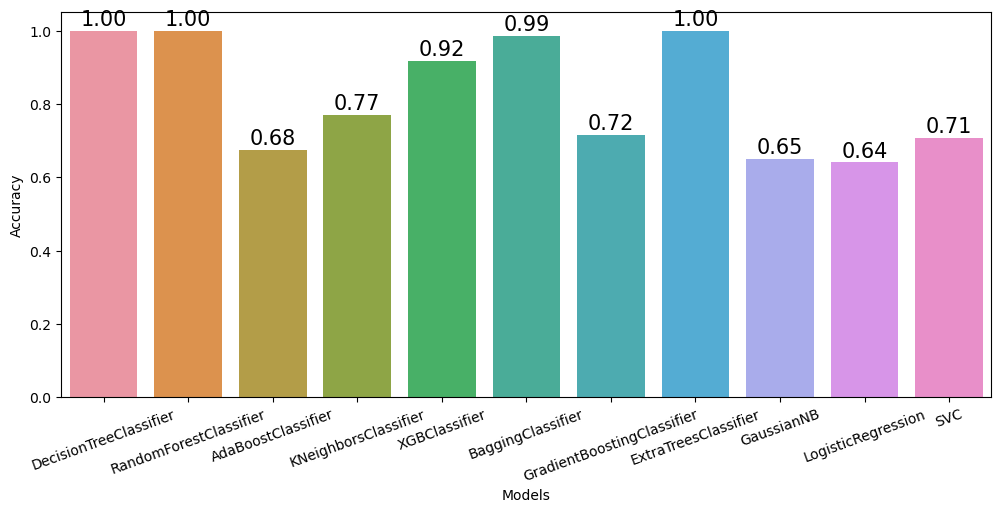

In [116]:
plt.figure(figsize=(12, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

### RandomForestClassifier model are  performs better among all the models.

## Feature importance 

In [130]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Choose the type of classifier.
rfc = RandomForestClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)
rf = rfc.fit(X_train, y_train)
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
weight              0.246592
cost                0.201687
discount            0.163339
rating              0.072163
num_calls           0.069177
num_prev_orders     0.063889
block_F             0.016333
ship_method_Ship    0.016145
gender_F            0.014944
block_B             0.014852
block_D             0.014680
gender_M            0.014601
priority_medium     0.014559
block_C             0.014379
block_A             0.014225
priority_low        0.014145
ship_method_Flight  0.013561
ship_method_Road    0.013487
priority_high       0.007242


In [131]:
feature_names = X_train.columns

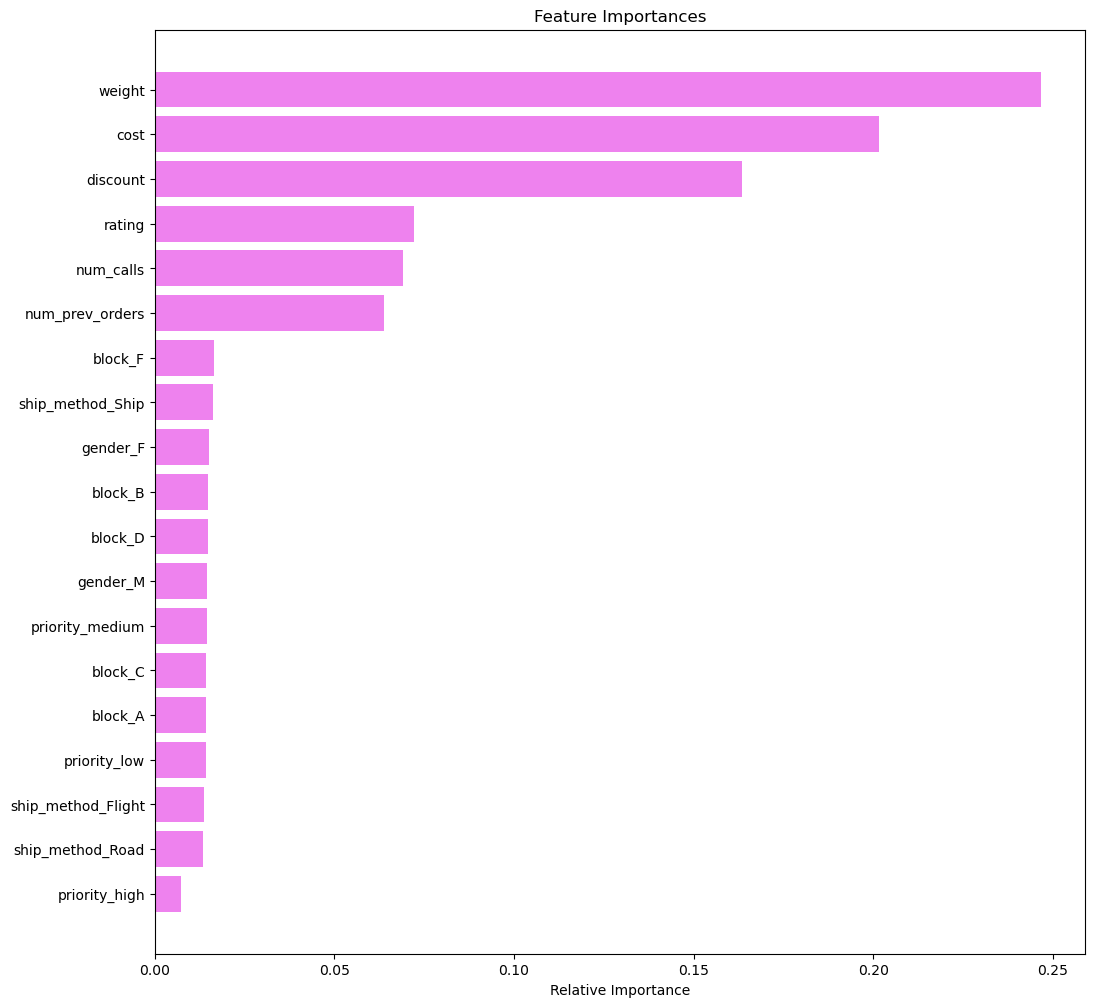

In [132]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Business Insights and Recommendations

**As a result of this analysis, I would highly suggest this company restructure their product delivery strategies as over half (nearly 60%) of order were not delivered on time. Warehouse block F received way more orders than any other block. I would recommend splitting orders up evenly between blocks to try and reduce backlog. Overall, the customer rating is fairly average, this could likely be increased easily, but the current figure is not too bad. If there were more features about the data, I would be interested at looking at why the discount relates to the liklihood of being delivered on time, my best guess may be that products with higher discounts are products that the company may be trying to move faster to make room for new inventory**

# <a id='link1'>Summary of EDA</a>
**Data Description:**

* The dataset has 10999 rows and 12 columns of data.
* There are no null values in the dataset.
* 'ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object').

**Data Cleaning:**

* ID variable and not useful for predictive modeling.
* There are no duplicate values in the data.
* Number of Unique Values in Each Column:
    * Warehouse_block           5
    * Mode_of_Shipment          3
    * Customer_care_calls       6
    * Customer_rating           5
    * Cost_of_the_Product     215
    * Prior_purchases           8
    * Product_importance        3
    * Gender                    2
    * Discount_offered         65
    * Weight_in_gms          4034
    * Reached.on.Time_Y.N       2

## Observations from EDA:

###  Distribution of Features ##

#### Categorical:

* Warehouse block: The company has a big warehouse, which is divided in to blocks
* Mode of shipment: The company ships the products in multiple ways
* Product importance: Company assigns priority levels to each shipment
* Gender: Male and Female
* Reached on time: Target variable where the package either arrived on time or not
  * 0: Arrived on time
  * 1: Did not arrive on time
     * 59% of orders did not arrive on time
     * Meaning about only 41% of orders arrived on time
          
### Numerical:

* Customer care calls: The number of calls made by the customer to get shipping updates
   * Average customer calls about 4 times
   * Min # of calls is 2
   * Max # of calls is 7
   
   
* Customer rating: The rating the customer gave the company (1-5)
   * Average rating is 2.99 on a scale of 1-5
   
   
* Cost of the product: Cost of product in USD
   * Average product cost is $210
   
   * Min price is $96
   
   * Max price is $310
    
* Prior purchases: Number of prior purchases by customer
    * Average is 3.5
    * Min is 2
    * Max is 10
    
* Discount offered : Discount offered on specific product
    * Average discount is 13%
    * Min discount is 1% (I assume this is equal to 0)
    * Max discount is 65%

* Weight in gms : Weight of the package in grams
    * Average product weight is about 3634 grams (about 8 pounds)
    * Min weight is 1001 (about 2.2 pounds)
    * Max weight is 7846 (a little over 17 pounds)



## Univariate Observations :

* Warehouse_block is broken down into 5 categories: A, B, C, D, F
* ship_method has 3 categories: plane, ship, or road
* There are 3 priority levels: low, medium, high
* Warehouse block F has the most orders with just over 3,500. The other 4 all have just under 2,000 orders
* Ship is by far the most common transportation method with
* Most customers call about the status of their order 3-4 times, but 5 calls is not far behind
* As stated before, the average rating is just under 3 on a 1-5 scale. This is because the distribution of ratings is extremely equal
* Most customers have 3 previous orders, but it is not uncommon for a customer to have between 2-5 prior purchases
* About 48% of the orders are of low priority and the rest is made up of 43% medium priorty and the other ~9% is high priority
* The dataset represents almost a perfect split of orders by Males and Females, with there being slightly more orders by Females
* About 60% of orders are NOT delivered on time, and the other 40% are delivered as estimated
* Most orders cost between $150-\$250
* Almost all discounts are 10% or less with the highest discount at almost 65%, but it is very uncommon
* The heaviest order is just under 8,000g. The distribution of package weights is bimodal, with peaks between 1,000g - 2,000g and a peak at 4,000g - 6,000g


# Bivariate Observations :

* The relationship between the number of calls a customer makes and the cost of the product consistenltly increase as the cost rises
* On the other hand, the number of calls decreases as the discount % decreases. The higher the discount, the less likely a    customer is to inquire about it
* Heavier products are more likely to arrive on time
* Higher discounted products are much less likely to arrive on time

# Multivariate Observations :

* The product discount is the feature that most highly correlates to if a product is delivered on time

* Number of calls and product cost are also highly correlated

* Discount Offered have high positive correlation with Reached on Time or Not of 40%.
* Weights in gram have negative correlation with Reached on Time or Not -27%.
* Discount Offered and weights in grams have negative correlation -38%.
* Customer care calls and weights in grams have negative correlation -28%.
* Customer care calls and cost of the product have positive correlation of 32%.
* Prior Purchases and Customer care calls have slightly positive correlation.